# Social Computing/Social Gaming - Summer 2021
# Exercise Sheet 1 - Introduction to Python and Network Visualization
Welcome to the 2021 Social Computing / Social Gaming tutorial assignments. For all exercise sheets Python is the programming language of choice. This exercise sheet will therefore provide an introduction to Python for you. In the latter part of this exercise sheet you will take on your first Social Computing task.

In addition to the iPython notebooks, it is recommended to have a look at the introduction videos and/or the introduction slides, both provided on Moodle, for every exercise sheet as they contain **helpful hints** and the **form of the assignment** which is **mandatory**!

## Task 1.1: Sparse Vector Representation
To get you prepared for using Python in the upcoming exercise sheets we will introduce some of Python's most important features on the example of sparse vectors. The basic idea is that sparse vectors (vectors whose positions are mostly zero) can be represented more efficiently by only saving a list of tuples containing the valueable data's position and its data. For example (0,0,0,4,0,0,42) would be represented by [(3,4),(6,42)].

In [2]:

#Your example data
ExampleVector1 = ('test',0,1,2)
ExampleVector2 = (10,1,2,'test',0,2)


**a)** As the first step, **complete** the ``sparseVectorTransform()`` function so that it transforms the given vector to a list of tuples as stated in the example above. Create reasonable ``ExampleVectors`` in the block above to test your function.

**Hint:** You can use ``enumerate()`` in a for-loop.

In [3]:
def sparseVectorTransform(vector):
    sparse=[]
    for index,value in enumerate(vector):
        if value != 0:
            sparse.append((index,value))
    print(sparse)
    return sparse
            

**b)** In Python, variables are not assigned to a fixed datatype in contrast to Java for example. As a result, lists, for example, may contain elements of different datatypes. Even a function can be stored in a variable or list.
Below you can see ``combineSVs()`` which combines two of our sparse vectors in tuple representation into one by only considering positions that are set in both vectors. The data entries for the respective position are combined by using the passed function. As you can see, the function is handed over just like regular parameters in Python.

In [4]:
def combineSVs(func,SV1,SV2):
    returnlist = []
    for element1 in SV1:
        for element2 in SV2:
            if element1[0] == element2[0]: returnlist.append( (element1[0], func(element1[1],element2[1])))
    return returnlist

It is now your task to **define** such a combining function to hand over to the `combineSVs()`. As we will only know at runtime what datatypes are contained in the vector, this function first needs to check which datatypes the given parameters have. For this task we will allow the vectors to contain Integers, Strings and Functions.
Depending on datatypes, the result for their combination should be:
- Integer & Integer => Add both Integers
- String & String => Concatenate both String sequences
- String & Integer => Add the Integer as character at the end of the String
- Integer & String => Multiply the String sequence by Integer.
- Function & (String||Integer) => The result of the Function with the String or Integer as its parameter

In [5]:
def combineElements (element1,element2):
    if type(element1) is int and type(element2) is int:
        return element1+element2
    elif type(element1) is int and type(element2) is str:
        return element1*element2
    elif type(element1) is str and type(element2) is str:
        return element1+element2
    elif type(element1) is str and type(element2) is int:
        return element1+str(element2)
    elif callable(element1)  and (type(element2) is (int or str)):
        return element1(element2)
    else:
        raise TypeError("Zulässige Kombinationen der Datentypen nicht eingehalten!")

**c)** Now **update** your previously set ``ExampleVectors`` so that all of our set combinations come to effect at least once and **compute** your final combined sparse vector in tuple representation. Then shortly **explain** in your own words the chances and pitfalls of Python's datatype independent variables. Three sentences will be sufficient.

In [6]:
print(combineSVs(combineElements, sparseVectorTransform(ExampleVector1), sparseVectorTransform((ExampleVector2))))

[(0, 'test'), (2, 1), (3, 2)]
[(0, 10), (1, 1), (2, 2), (3, 'test'), (5, 2)]
[(0, 'test10'), (2, 3), (3, 'testtest')]


**Having dynamically typed variables are more flexible and therefore may speed up the programming. However, pitfalls are e.g. <br> - that variables type might change without notice e.g. <br>integer_number =5<br>integer_number= integer_number/2 #this is now float<br><br>- one might misspells a variable and instead of receiving an error one gets a new variable.**

## Task 1.2: Twitch Social Network with NetworkX

For your second task you will now take your first steps into Social Computing / Social Gaming. We will therefore have a look at German streamers from [Twitch](https://www.twitch.tv/) [1]. Twitch is an international platform for live-streaming games or other content. The data set [2] has been created in 2019 and contains lots of information about different streamers. 
For our tasks we will only consider the German Twitch-streamers. Twitch offers lots of functionalities including a friendship system. The task is to draw a graph representing the **friendship network** of the hundred most watched German streamers.

In [7]:
#Import the required libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'networkx'

**Read** in the data set by using the **Pandas** library [3]. It can represent the data sets as ``DataFrame`` objects and offers a multitude of functionalities for you. For your exercise sheets it will always come in handy to have a look at the used package's **documentations** online!

**Inspect** the three dataframes to fully understand what they contain. Don't confuse the Twitch IDs (``id``) with the node's IDs for our data set (``new_id``), which will form the key for our dataset.

**Hint:** You can have a look at the first entries of your Pandas data-frames with `Dataframe.head(10)`.

In [7]:
#Contains a multitude of information about the streamers (adressed by their Twitch IDs).
nodes_DF = pd.read_csv('musae_DE_target.csv')
#Contains the friendship relations between streamers.
edges_DF = pd.read_csv('musae_DE_edges.csv')
#Contains the names of the top 100 Twitch-streamer for their Twitch IDs.
twitchNames_DF = pd.read_csv('TwitchIDList.csv')

nodes_DF.info()
print(nodes_DF.head())
edges_DF.info()
print(edges_DF.head())
twitchNames_DF.info()
print(twitchNames_DF.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9498 entries, 0 to 9497
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       9498 non-null   int64
 1   days     9498 non-null   int64
 2   mature   9498 non-null   bool 
 3   views    9498 non-null   int64
 4   partner  9498 non-null   bool 
 5   new_id   9498 non-null   int64
dtypes: bool(2), int64(4)
memory usage: 315.5 KB
          id  days  mature   views  partner  new_id
0   37905227  2149    True  162078    False    5079
1   63102384  1574    True    1370    False    4281
2  109414094  1034    True    6043    False     992
3   84163849  1319    True   94298     True    9021
4   38240837  2137    True    2323    False     330
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153138 entries, 0 to 153137
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   from    153138 non-null  int64
 1   to      153138 non-nul

**a)** First, we will deal with our graph's nodes, the streamers. **Remove** the unnecessary information by **dropping** the `id`, ``days`` and ``mature`` columns from ``nodes_DF``. Limit the data on the 100 most viewed streamers, then **order** ``nodes_DF`` by ``views`` and only **keep** the first 100 entries as ``orderedNodes_DF``.

In [8]:
nodes_DF.drop(columns=['id','days','mature'],inplace=True)
orderedNodes_DF=nodes_DF.sort_values('views',ascending=False)
orderedNodes_DF=orderedNodes_DF.head(100)
orderedNodes_DF.info()
orderedNodes_DF.head()
#TODO:


<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 4254 to 2525
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   views    100 non-null    int64
 1   partner  100 non-null    bool 
 2   new_id   100 non-null    int64
dtypes: bool(1), int64(2)
memory usage: 2.4 KB


,views,partner,new_id
4254,100394785,True,8753
1091,70620803,True,9206
2610,54516100,True,7787
7546,28609290,True,2498
6054,27149993,True,2452


**b)** Now we need to work on the friendship data-frame, our graph's edges. As we will only draw the top 100 streamers as nodes, we are only interested in friendship relations in between these 100 nodes. The relations are represented as "from"->"to" even though the friendship relation is considered undirected.

**Fill** ``drop_indices`` with all entry's indices that have their target outside of our 100 nodes. Therefore go through all entries of `edges_DF` and check if their ``to`` value is contained in ``nodesList``.
Then **drop** all the respective entries from our data-frame.

**Hint:** We do not need to worry about the ``from`` values as our merging process will take care of that part in the next task.

In [9]:
#edges_DF.info()
#print(edges_DF.head())
drop_indices =[]
nodesList = orderedNodes_DF['new_id'].tolist()

## These two steps are unnecessary, however, i added the correct result for drop_indices to comply with eventual automatic tests
dropped_edges_DF=edges_DF[~edges_DF.to.isin(orderedNodes_DF.new_id)].dropna()
drop_indices =dropped_edges_DF['to'].to_list()

edges_DF=edges_DF[edges_DF.to.isin(orderedNodes_DF.new_id)].dropna()




**c)** For the next step, we now have to **merge** our dataframes. This works similar to a SQL Join operation. We want to use an **'inner' merge** (similar to an "inner"=="normal" join in SQL) and make sure the nodes ID matches the friendship relation's origin. Thus it will only consider any friendships of our 100 nodes.

In [10]:
edges_DF.info()
merged_DF = pd.merge(orderedNodes_DF,edges_DF,how="inner",left_on="new_id",right_on='from')
merged_DF.info()
merged_DF.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26706 entries, 0 to 153135
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   from    26706 non-null  int64
 1   to      26706 non-null  int64
dtypes: int64(2)
memory usage: 625.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 828 entries, 0 to 827
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   views    828 non-null    int64
 1   partner  828 non-null    bool 
 2   new_id   828 non-null    int64
 3   from     828 non-null    int64
 4   to       828 non-null    int64
dtypes: bool(1), int64(4)
memory usage: 33.2 KB


,views,partner,new_id,from,to
0,100394785,True,8753,8753,9206
1,70620803,True,9206,9206,7802
2,54516100,True,7787,7787,7802
3,54516100,True,7787,7787,7980
4,54516100,True,7787,7787,8700


Now networkX [4] **reads** all the edges from our dataframe and creates a Graph object. **Take a look** at the number of nodes in your graph and **explain** your observations shortly.

In [11]:
graph = nx.from_pandas_edgelist(merged_DF, "new_id", "to")
print(graph.number_of_nodes())
#TODO: Take a look at the number of nodes


95


**The number of nodes is less than the top 100 streamers. Meaning 5 of them are not friends with any other of the top 100.**

**d)** Before we finally draw our graph, lets add some **additional information** to it. We want to represent if the respective streamer is an official Twitch-partner by the **color** of a node.  The ``partner`` column in our dataframe will provide you with the partner-status. 

All entries were represented by their ID until now. To make our graph more legible we want to name all nodes with the streamers' actual names that are contained in ``twitchNames_DF``. You have now to **create two dictionaries** that map the nodes ID to its partner state and streamer's name.

After that the given code will create the color-map from your dictionary that will later be used to apply the colors to our graph. Then the graph object is created.

**Hint:** As ``twitchNames_DF`` only contains the most 100 viewed streamer's names you can use it as an indicator whether you have solved everything correctly.

In [12]:
orderedNodes_DF=pd.merge(orderedNodes_DF,twitchNames_DF,how="left",on='new_id')
orderedNodes_DF.info()
partnerState_dict = pd.Series(orderedNodes_DF['partner'].to_list(),index = orderedNodes_DF.new_id).to_dict()
twitchNames_dict = pd.Series(orderedNodes_DF['TwitchName'].to_list(),index = orderedNodes_DF.new_id).to_dict()

colormap = []
for node in graph:
    if(partnerState_dict[node] == True):
        colormap.append('Red')
    else:
        colormap.append('Blue')

graph = nx.relabel_nodes(graph, twitchNames_dict)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   views       100 non-null    int64 
 1   partner     100 non-null    bool  
 2   new_id      100 non-null    int64 
 3   TwitchName  100 non-null    object
dtypes: bool(1), int64(2), object(1)
memory usage: 3.2+ KB


**e)** Now to conclude your first exercise sheet you can finally draw the graph. NetworkX offers you multiple pre-defined **[graph layouts](https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout)** [5] that you can use. Don't forget to make use of the ``colormap`` and the set options! Matplotlib will then print your graph.

**Try** out the different layouts and chose two that fit the graph well. Then **explain** why they fit well and what **observations** you could draw from our visualized network shortly!

100
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   views       100 non-null    int64 
 1   partner     100 non-null    bool  
 2   new_id      100 non-null    int64 
 3   TwitchName  100 non-null    object
dtypes: bool(1), int64(2), object(1)
memory usage: 3.2+ KB
95


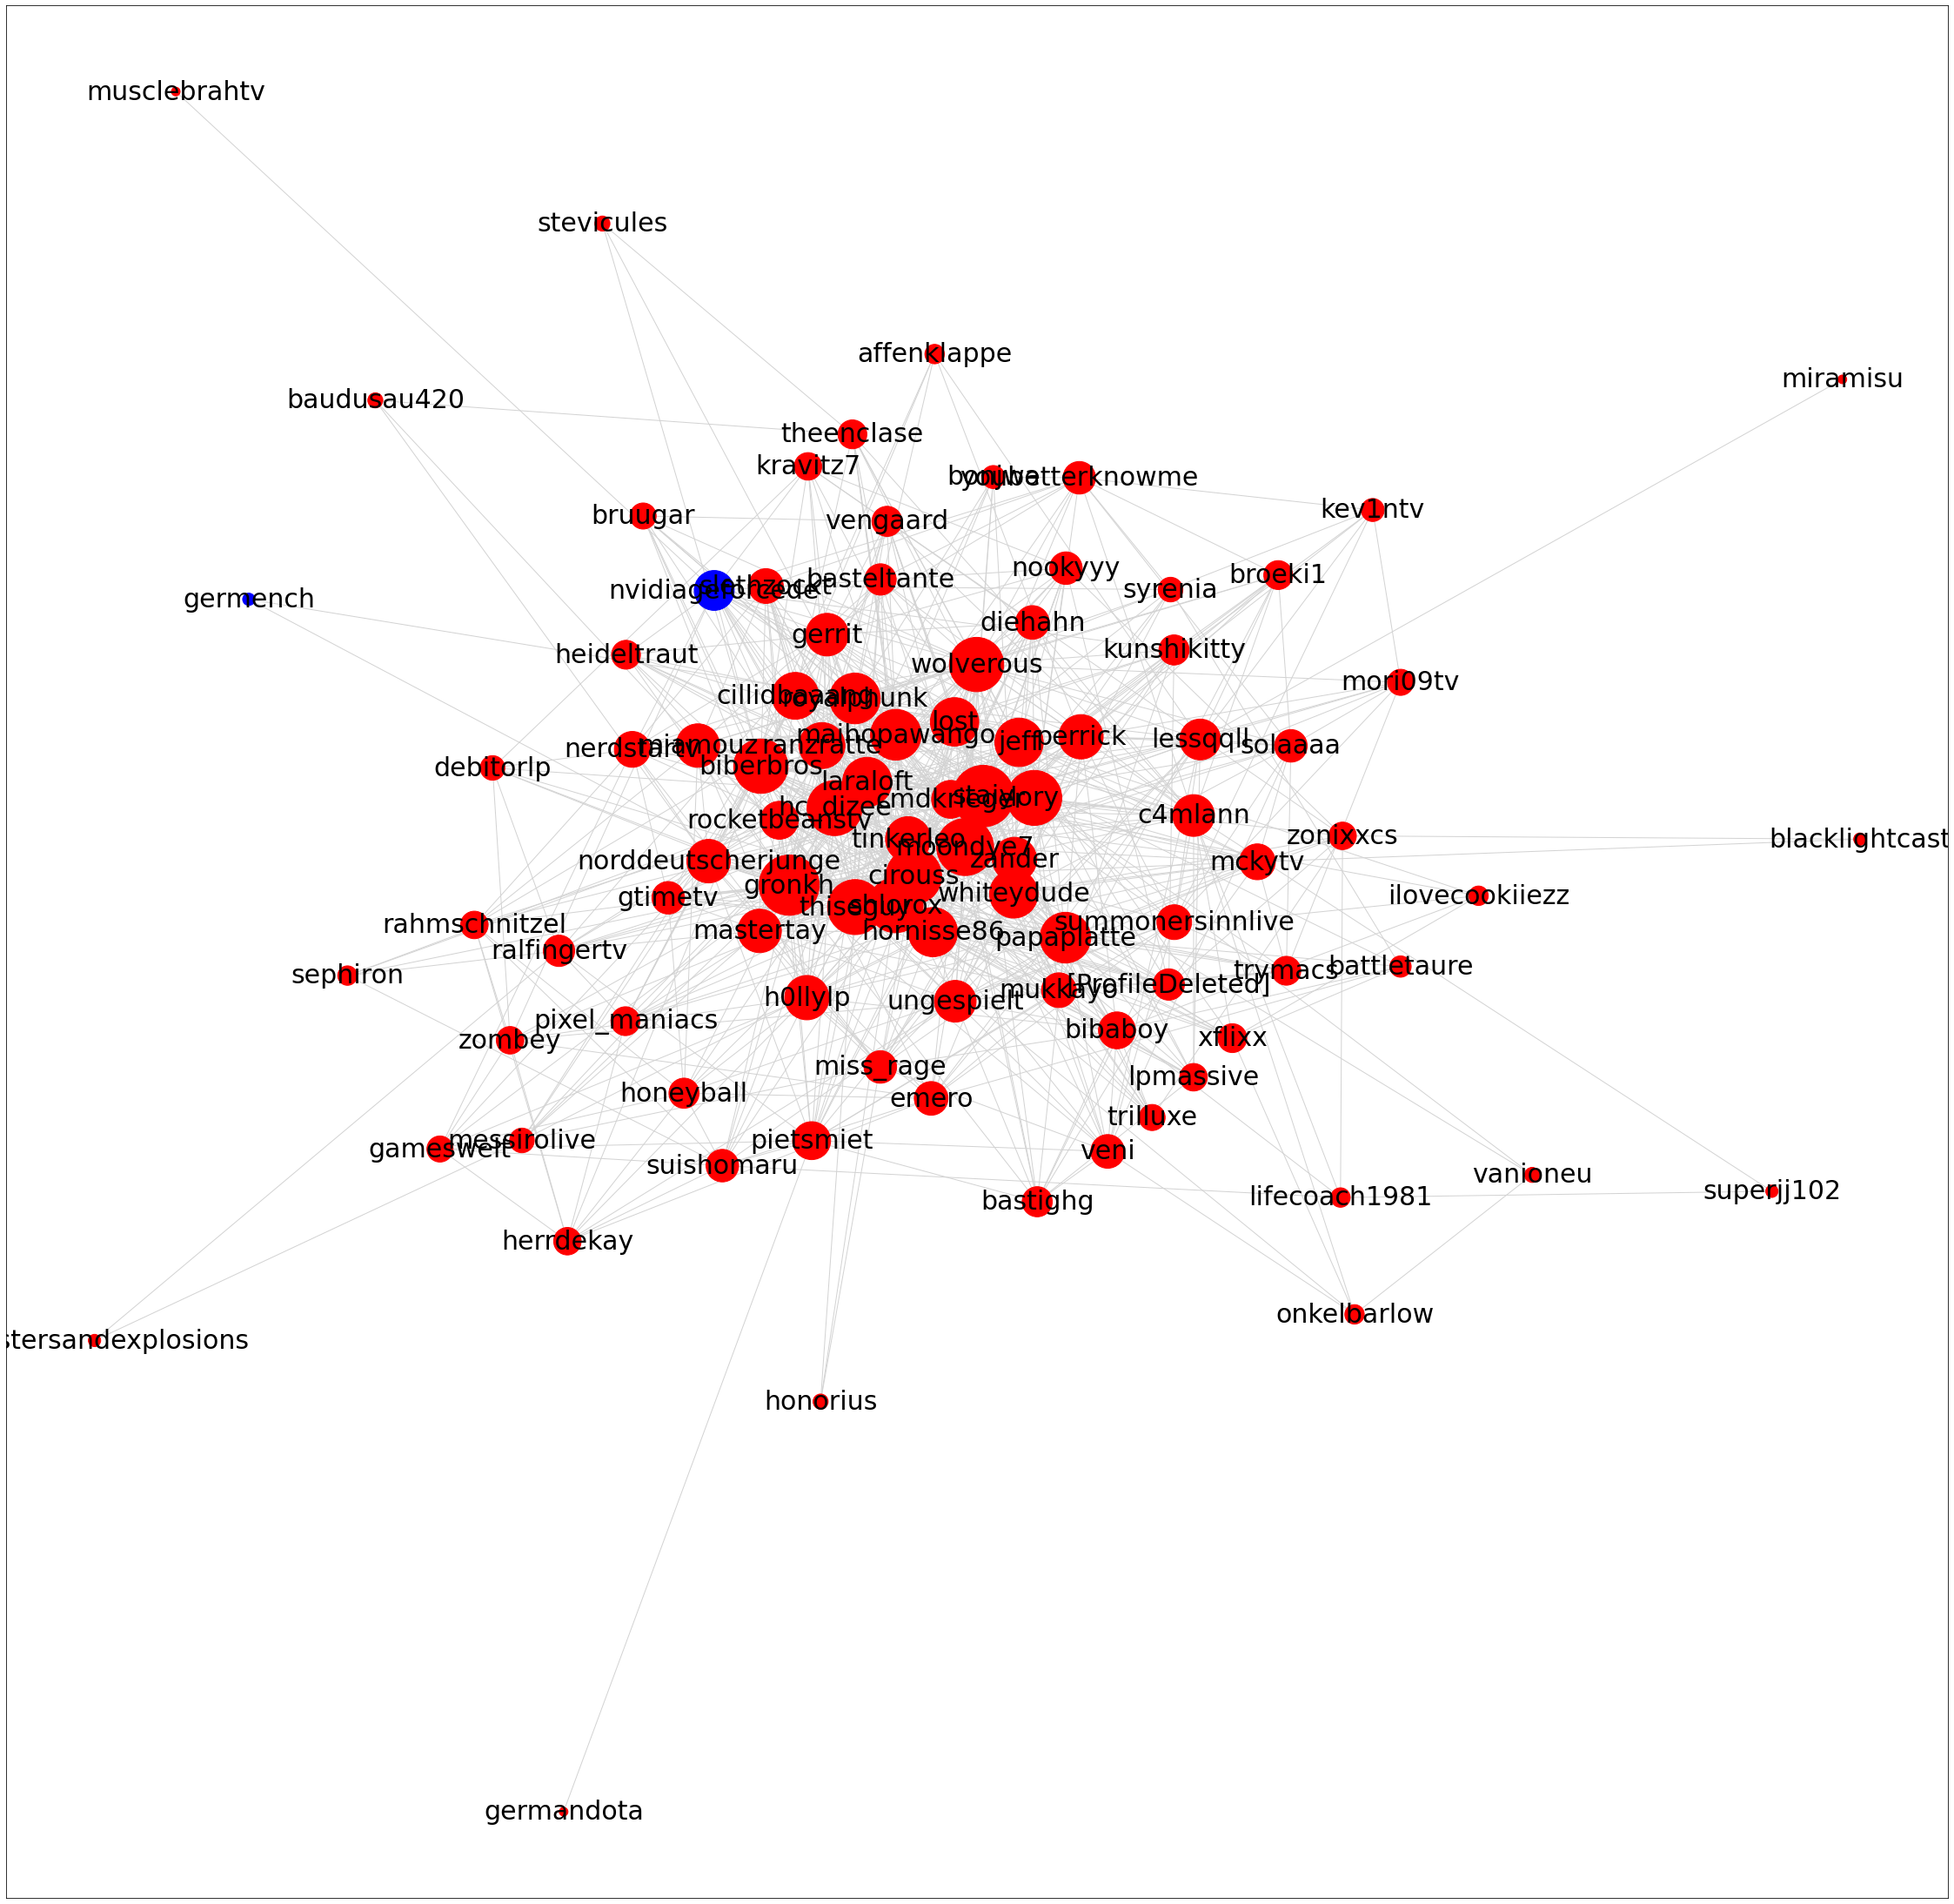

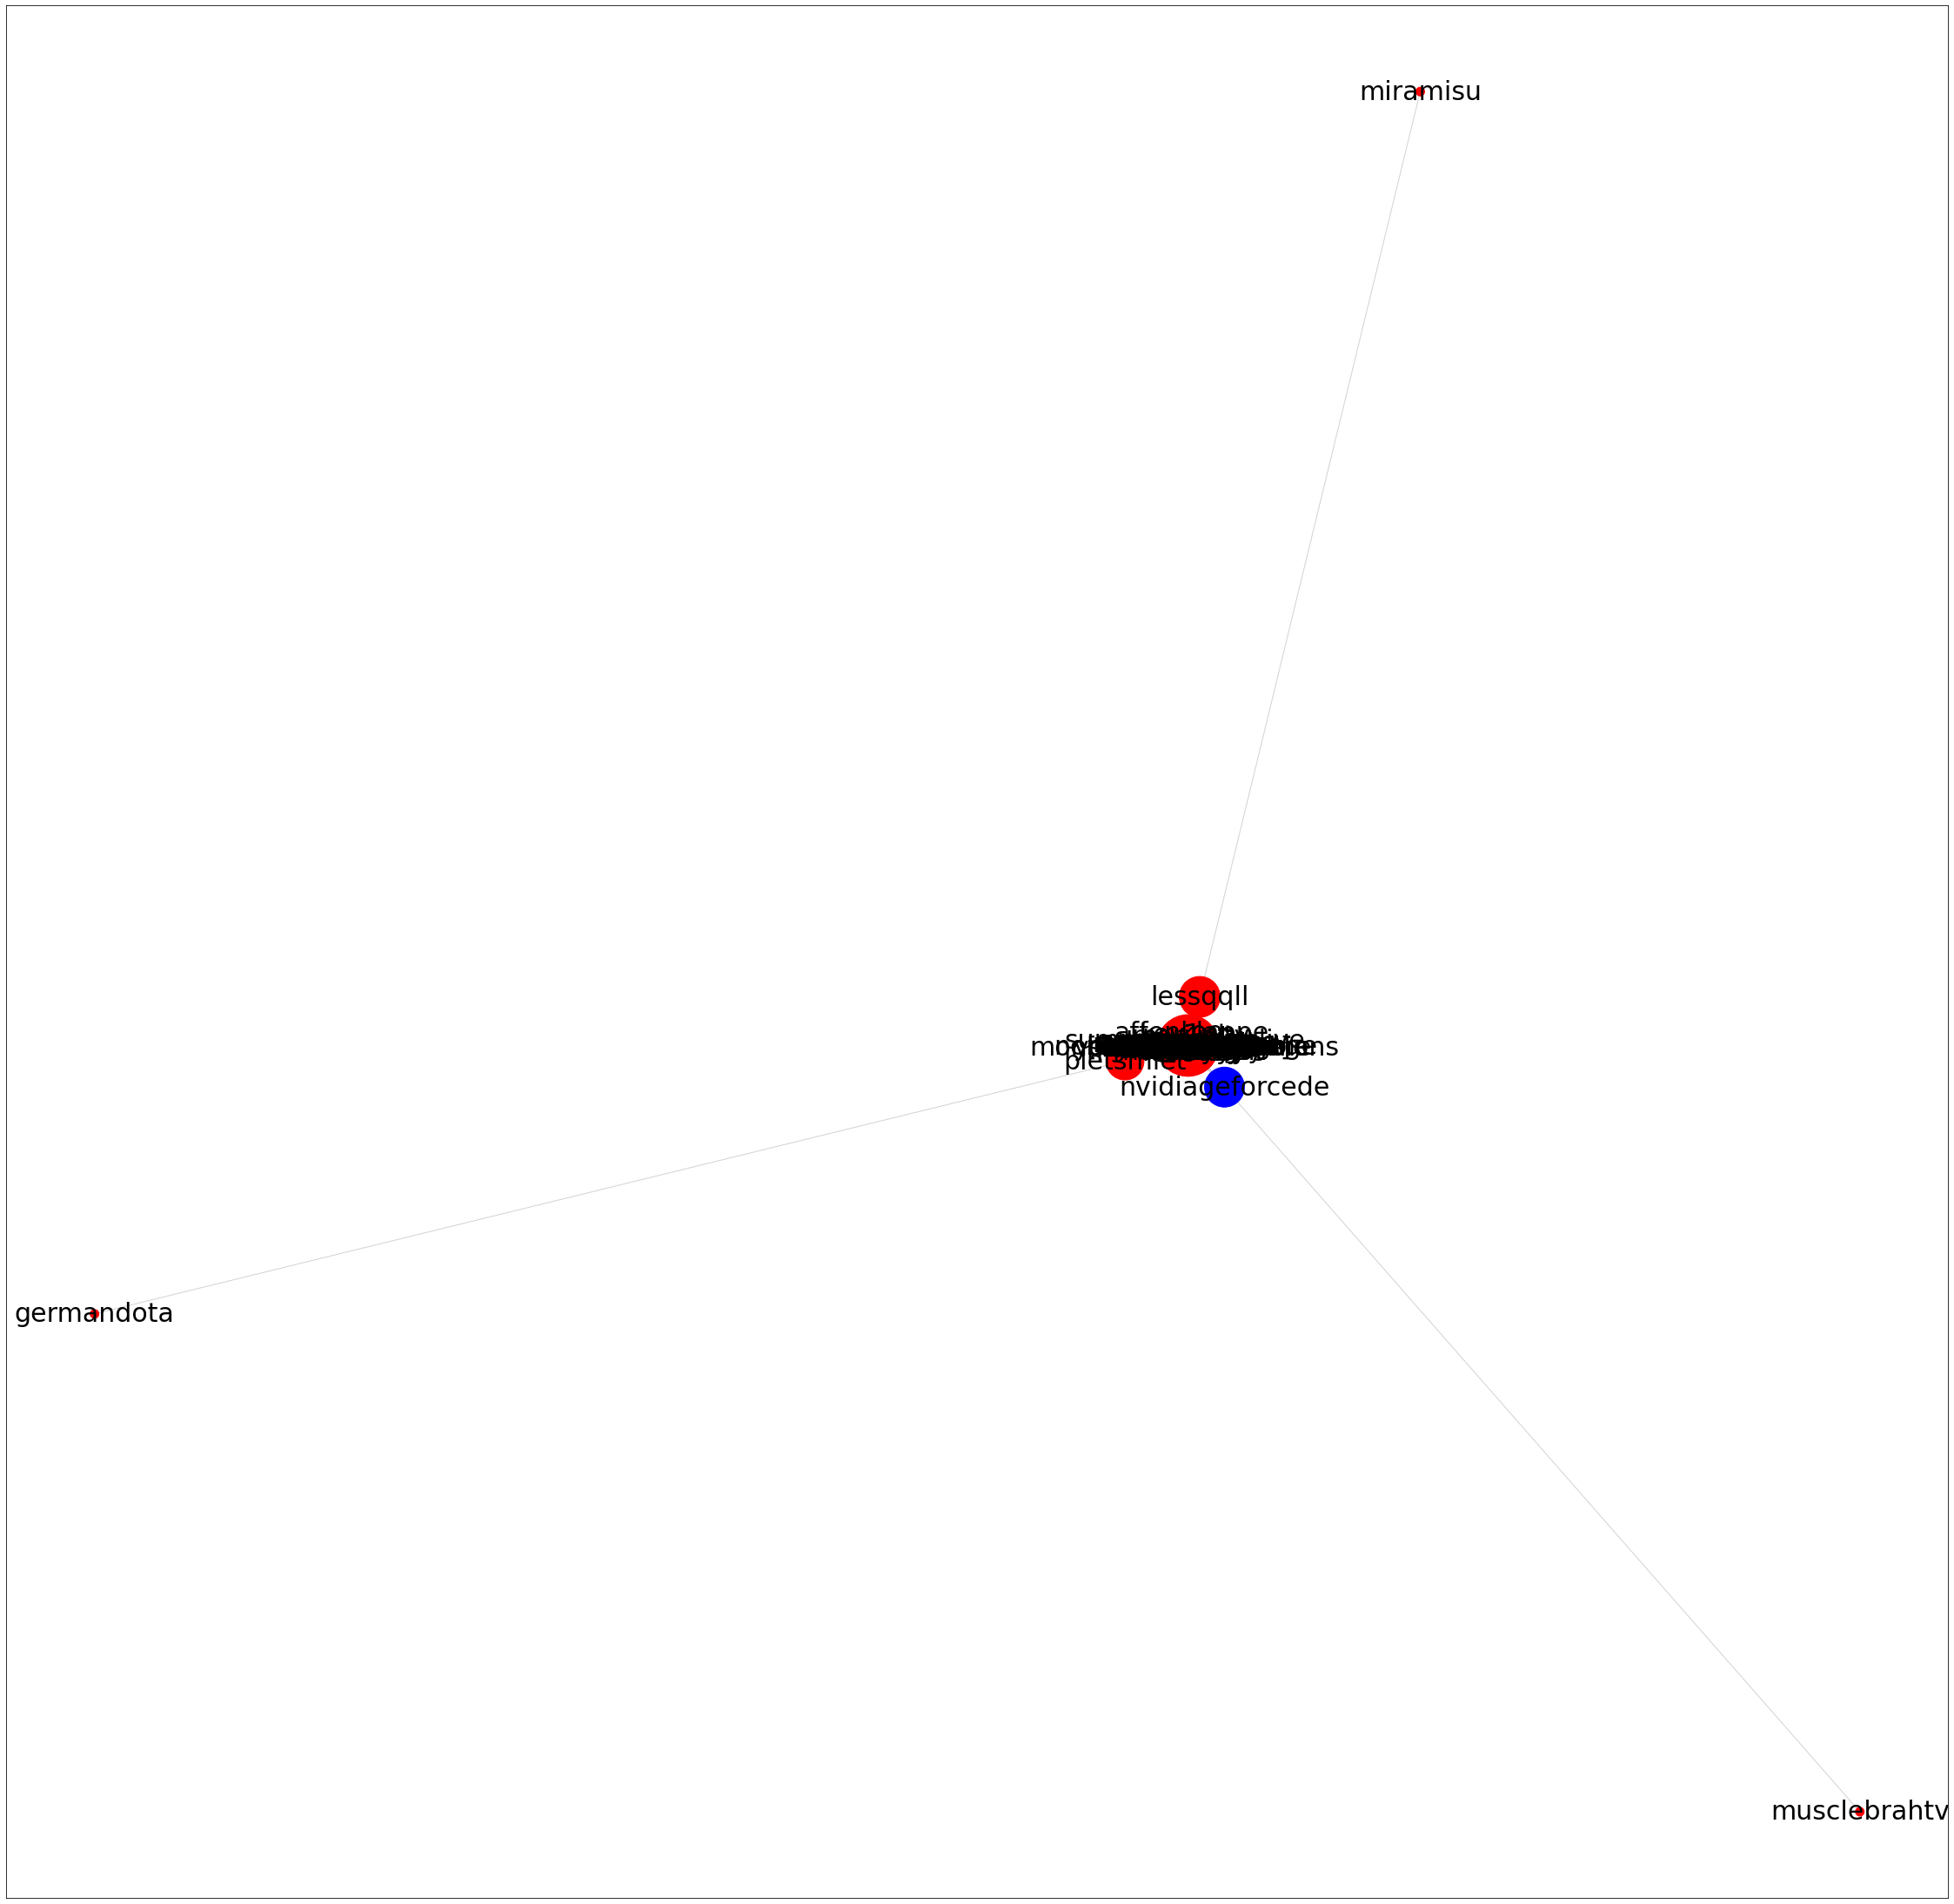

In [16]:
print(len(twitchNames_dict))
orderedNodes_DF.info()
plt.figure(1,figsize=(40,40)) 
options = {
    
    "font_size" : 30,
    "edge_color": 'lightGrey',
    "node_color":colormap
    }
edges = dict(graph.degree)
nx.draw_networkx(graph,pos=nx.spring_layout(graph),node_size=[v * 100 for v in edges.values()],**options)
plt.show()

plt.figure(1,figsize=(40,40)) 
nx.draw_networkx(graph,pos=nx.spectral_layout(graph),node_size=[v*100  for v in edges.values()],**options)
plt.show()


**First, Ich chose the default spring layout together with increasing the size of the nodes according to the number of edges, as it gives some feeling about how strongly connected they are. As one can see the most nodes are big and in the middle showing that connection is big under the top 100 streamers. Further, one can see that there are actually only two not beeing partners (blue nodes) with twitch also being further outside.**
 
**Second, I chose the spectral layout in order to see if  the friendships form some kind of groups. However, they all seem to be heavily intertwined forming one closeup center, with three streamers being only fried with one other streamer.**

## References

<br>[1] https://www.twitch.tv/
<br>[2] Rozemberczki, B., Allen, C. & Sarkar, R. (2019). *Multi-scale Attributed Node Embedding*
<br>[3] https://pandas.pydata.org/docs/getting_started/index.html
<br>[4] https://networkx.org/documentation/stable/reference/index.html
<br>[5] https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout